In [1]:
import pandas as pd
import numpy as np
import json

import seaborn as sns
%matplotlib inline

from pprint import pprint

In [2]:
df_clin_new = pd.read_csv("clinical_data.csv",sep=",")
df_clin_new.head()

,case_id,demographic_id,ethnicity,gender,race,submitter_id_demo,updated_datetime_demo,year_of_birth,year_of_death,age_at_diagnosis,...,submitter_id_diag,tissue_or_organ_of_origin,tumor_grade,tumor_stage,updated_datetime_diag,vital_status,exposure_id,submitter_id,updated_datetime,reference
0,b205c89f-af62-4186-acad-ed23d243fa98,55ae5a3b-e509-5fcd-98c9-c5007b448890,not hispanic or latino,female,white,TCGA-A2-A0YL_demographic,2016-09-02T19:00:43.039678-05:00,1962.0,NaN,17702.0,...,TCGA-A2-A0YL_diagnosis,c50.9,not reported,stage iiia,2016-09-02T19:00:43.039678-05:00,alive,23b6a296-e149-5801-aa20-e144ef683abe,TCGA-A2-A0YL_exposure,2016-09-02T19:00:43.039678-05:00,TCGA-A2-A0YL
1,70f34c5c-3671-44c8-9469-99f9786efec1,498e27fb-2201-524a-bdd1-86f4e53dc54b,not hispanic or latino,female,white,TCGA-D8-A1XR_demographic,2016-09-02T19:07:03.114741-05:00,1954.0,NaN,20488.0,...,TCGA-D8-A1XR_diagnosis,c50.9,not reported,stage iib,2016-09-02T19:07:03.114741-05:00,alive,6dfa11dc-4266-57c9-b746-02a6c7bb9d23,TCGA-D8-A1XR_exposure,2016-09-02T19:07:03.114741-05:00,TCGA-D8-A1XR
2,8986a141-eae7-4157-b695-02cc6fc3b071,8faa57d4-1199-53ce-a0ce-24d358841153,not hispanic or latino,female,white,TCGA-BH-A1ET_demographic,2016-09-02T18:57:52.265307-05:00,1944.0,2005.0,20425.0,...,TCGA-BH-A1ET_diagnosis,c50.9,not reported,stage i,2016-09-02T18:57:52.265307-05:00,dead,e72e6b02-58be-539a-af7f-f2714f14899a,TCGA-BH-A1ET_exposure,2016-09-02T18:57:52.265307-05:00,TCGA-BH-A1ET
3,7317e605-93ba-49a9-8743-20613b02767a,4394b44c-b51d-5b96-b62b-db7f49007b43,not hispanic or latino,female,white,TCGA-E2-A1LE_demographic,2016-09-02T19:09:17.163541-05:00,1937.0,2010.0,26239.0,...,TCGA-E2-A1LE_diagnosis,c50.9,not reported,stage iiic,2016-09-02T19:09:17.163541-05:00,dead,4c456a08-ffda-507f-a3e3-d273e5c49864,TCGA-E2-A1LE_exposure,2016-09-02T19:09:17.163541-05:00,TCGA-E2-A1LE
4,7e1673f8-5758-4963-8804-d5e39f06205b,eebe9198-74c8-5996-bf88-c56d5fd6832f,not hispanic or latino,female,asian,TCGA-C8-A12V_demographic,2016-09-02T19:02:30.147198-05:00,1955.0,NaN,20346.0,...,TCGA-C8-A12V_diagnosis,c50.9,not reported,stage iia,2016-09-02T19:02:30.147198-05:00,alive,dd5fbf53-64a4-5bc0-8ca7-ae05abbcbbac,TCGA-C8-A12V_exposure,2016-09-02T19:02:30.147198-05:00,TCGA-C8-A12V


In [3]:
df_distances_new = pd.read_csv("distances_matrix.csv",sep=",", index_col=0)
df_distances_new.head()

,TCGA-3C-AAAU,TCGA-3C-AALI,TCGA-3C-AALJ,TCGA-3C-AALK,TCGA-4H-AAAK,TCGA-5L-AAT0,TCGA-5L-AAT1,TCGA-5T-A9QA,TCGA-A1-A0SB,TCGA-A1-A0SD,...,TCGA-UL-AAZ6,TCGA-UU-A93S,TCGA-V7-A7HQ,TCGA-W8-A86G,TCGA-WT-AB41,TCGA-WT-AB44,TCGA-XX-A899,TCGA-XX-A89A,TCGA-Z7-A8R5,TCGA-Z7-A8R6
TCGA-3C-AAAU,0.000000,0.120880,0.105801,0.109540,0.118014,0.116020,0.138326,0.139012,0.164870,0.109789,...,0.130849,0.177643,0.202318,0.118387,0.204810,0.172970,0.131472,0.147361,0.160945,0.102312
TCGA-3C-AALI,0.120880,0.000000,0.086734,0.086734,0.105240,0.102997,0.095894,0.142688,0.183251,0.114400,...,0.117577,0.143124,0.172721,0.125615,0.158141,0.134712,0.116518,0.119447,0.129105,0.101502
TCGA-3C-AALJ,0.105801,0.086734,0.000000,0.072653,0.091719,0.082123,0.096455,0.141006,0.181756,0.102686,...,0.108979,0.147735,0.151162,0.113216,0.138139,0.120631,0.100941,0.103558,0.112343,0.083557
TCGA-3C-AALK,0.109540,0.086734,0.072653,0.000000,0.040750,0.040376,0.062932,0.144121,0.129292,0.053960,...,0.117827,0.158452,0.146738,0.062870,0.165742,0.102312,0.060814,0.073400,0.080130,0.070721
TCGA-4H-AAAK,0.118014,0.105240,0.091719,0.040750,0.000000,0.037074,0.065612,0.152471,0.113901,0.054209,...,0.143560,0.180884,0.172347,0.065300,0.187800,0.112343,0.059381,0.069163,0.097015,0.078198


In [4]:
df_clin = df_clin_new

In [5]:
df_clin.columns

Index(['case_id', 'demographic_id', 'ethnicity', 'gender', 'race',
       'submitter_id_demo', 'updated_datetime_demo', 'year_of_birth',
       'year_of_death', 'age_at_diagnosis', 'classification_of_tumor',
       'days_to_birth', 'days_to_death', 'days_to_last_follow_up',
       'diagnosis_id', 'last_known_disease_status', 'morphology',
       'primary_diagnosis', 'prior_malignancy', 'progression_or_recurrence',
       'site_of_resection_or_biopsy', 'submitter_id_diag',
       'tissue_or_organ_of_origin', 'tumor_grade', 'tumor_stage',
       'updated_datetime_diag', 'vital_status', 'exposure_id', 'submitter_id',
       'updated_datetime', 'reference'],
      dtype='object')

In [6]:
make_graph_df = df_clin.drop(['case_id', 'reference', 'demographic_id', 'diagnosis_id', 'submitter_id_diag', 'exposure_id', 'submitter_id', 'updated_datetime_demo', 'updated_datetime_diag'], axis=1)

In [7]:
make_graph_df['submitter_id_demo'] = make_graph_df['submitter_id_demo'].apply(lambda x: x[:12])

In [8]:
make_graph_df.set_index('submitter_id_demo', inplace=True)

In [9]:
graph_prop = make_graph_df.to_dict(orient = 'index')

In [10]:
# List of identifiers
patients = list(df_distances_new.columns)

In [11]:
graph_prop['TCGA-A2-A0ET']

{'age_at_diagnosis': 21464.0,
 'classification_of_tumor': 'not reported',
 'days_to_birth': -21464.0,
 'days_to_death': nan,
 'days_to_last_follow_up': 1066.0,
 'ethnicity': 'not hispanic or latino',
 'gender': 'female',
 'last_known_disease_status': 'not reported',
 'morphology': '8500/3',
 'primary_diagnosis': 'c50.9',
 'prior_malignancy': 'not reported',
 'progression_or_recurrence': 'not reported',
 'race': 'white',
 'site_of_resection_or_biopsy': 'c50.9',
 'tissue_or_organ_of_origin': 'c50.9',
 'tumor_grade': 'not reported',
 'tumor_stage': 'stage iiia',
 'updated_datetime': '2016-09-02T19:04:13.955394-05:00',
 'vital_status': 'alive',
 'year_of_birth': 1950.0,
 'year_of_death': nan}

In [12]:
graph_json = {}

In [13]:
graph_json['nodes'] = []
for i in range(10):
    t = {}
    t['data'] = graph_prop[patients[i]]
    t['data']['id'] = i
    t['data']['reference id'] = patients[i]
    graph_json['nodes'].append(t)

In [14]:
graph_json['links'] = []
for i in range(10):
    for j in range(i):
        t = {}
        t['data'] = {}
        t['data']['source'] = i
        t['data']['target'] = j
        t['data']['distance'] = df_distances_new[patients[i]][patients[j]]
        graph_json['links'].append(t)

In [15]:
graph_json

{'links': [{'data': {'distance': 0.120879805595364, 'source': 1, 'target': 0}},
  {'data': {'distance': 0.105800984485015, 'source': 2, 'target': 0}},
  {'data': {'distance': 0.086734375973580899, 'source': 2, 'target': 1}},
  {'data': {'distance': 0.109539535173531, 'source': 3, 'target': 0}},
  {'data': {'distance': 0.086734375973580899, 'source': 3, 'target': 1}},
  {'data': {'distance': 0.072652501713502404, 'source': 3, 'target': 2}},
  {'data': {'distance': 0.118013583400835, 'source': 4, 'target': 0}},
  {'data': {'distance': 0.10524020188173699, 'source': 4, 'target': 1}},
  {'data': {'distance': 0.091719110224936104, 'source': 4, 'target': 2}},
  {'data': {'distance': 0.040750202504828997, 'source': 4, 'target': 3}},
  {'data': {'distance': 0.116019689700293, 'source': 5, 'target': 0}},
  {'data': {'distance': 0.10299707146862699, 'source': 5, 'target': 1}},
  {'data': {'distance': 0.082123496791077305, 'source': 5, 'target': 2}},
  {'data': {'distance': 0.040376347435977303, 

In [28]:
import json
with open('data.json', 'w') as outfile:
    json.dump(graph_json, outfile, ensure_ascii=False)

In [6]:
# Deciding on the cutoff for the distance
dist = []
for i in range(1093):
    for j in range(i):
        dist.append(df_distances_new[patients[i]][patients[j]])

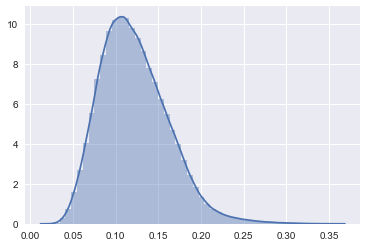

In [10]:
sns.distplot(dist)
